<a href="https://colab.research.google.com/github/BastianAndresDev/cnn-fashionmnist/blob/main/TP1/cnn_fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=fae9d0aa5fee0411386bce16aa5a5030f40fcfac3d457570cae38b56f6c95673
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix


import idx2numpy

# FASE 1: Entendimiento del negocio



1. Definir los Objetivos del Proyecto:
*   El objetivo principal del proyecto es desarrollar un modelo de clasificación de imágenes de moda utilizando técnicas de aprendizaje profundo.
*   El modelo debe ser capaz de clasificar imágenes de productos de moda en 10 categorías diferentes con precisión.

2.   Contexto del Negocio

*   El comercio electrónico de moda ha utilizado ampliamente el aprendizaje profundo para resolver problemas como el reconocimiento de ropa, búsqueda de ropa y recomendación de productos.
*   La clasificación de la ropa es desafiante debido a la gran variedad de estilos, colores y texturas.
*   El modelo de clasificación de imágenes se utilizará para mejorar la experiencia del usuario en plataformas de comercio electrónico de moda, permitiendo una búsqueda más precisa y recomendaciones personalizadas.









# FASE 2: Análisis de datos

In [ ]:
#Nos conectamos al drive para tener el dataset en la nube
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imagenes de test

In [ ]:
# Ruta al archivo .ubyte #IMAGE
path = '/content/drive/MyDrive/SemestralDeepLearning/t10k-images-idx3-ubyte'

# Carga el archivo .ubyte utilizando idx2numpy
test_images = idx2numpy.convert_from_file(path)

importamos struct de Python para interpretar los datos en el archivo .ubyte como enteros de 8 bits sin signo, que son los formatos comunes para los archivos de etiquetas MNIST. Ya que en el archivo .ubyte vienen como matrices y no como valores escalares, esto generaba que sea mas dificl acceder a la etiquetas al momento de juntarlas con las imagenes.

Ademas que solamente dejamos los valores unico lo que nos ayuda luego al momento de entrenar nuestros datos

In [ ]:
import struct
# Ruta al archivo .ubyte de etiquetas
path_etiquetas = '/content/drive/MyDrive/SemestralDeepLearning/t10k-labels-idx1-ubyte'

# Función para cargar las etiquetas desde el archivo .ubyte
def cargar_etiquetas(path):
    with open(path, 'rb') as f:
        # Leer el encabezado del archivo
        magic_number, num_items = struct.unpack(">II", f.read(8))
        # Leer las etiquetas como bytes
        etiquetas_bytes = f.read()
        # Convertir bytes a una lista de enteros
        etiquetas = [int(byte) for byte in etiquetas_bytes]
    return etiquetas

# Cargar las etiquetas desde el archivo .ubyte
test_labels = cargar_etiquetas(path_etiquetas)

# Mostrar las primeras 10 etiquetas como ejemplo
print("Etiquetas cargadas correctamente:")
print(test_labels[:10])


Etiquetas cargadas correctamente:
[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


In [ ]:
nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

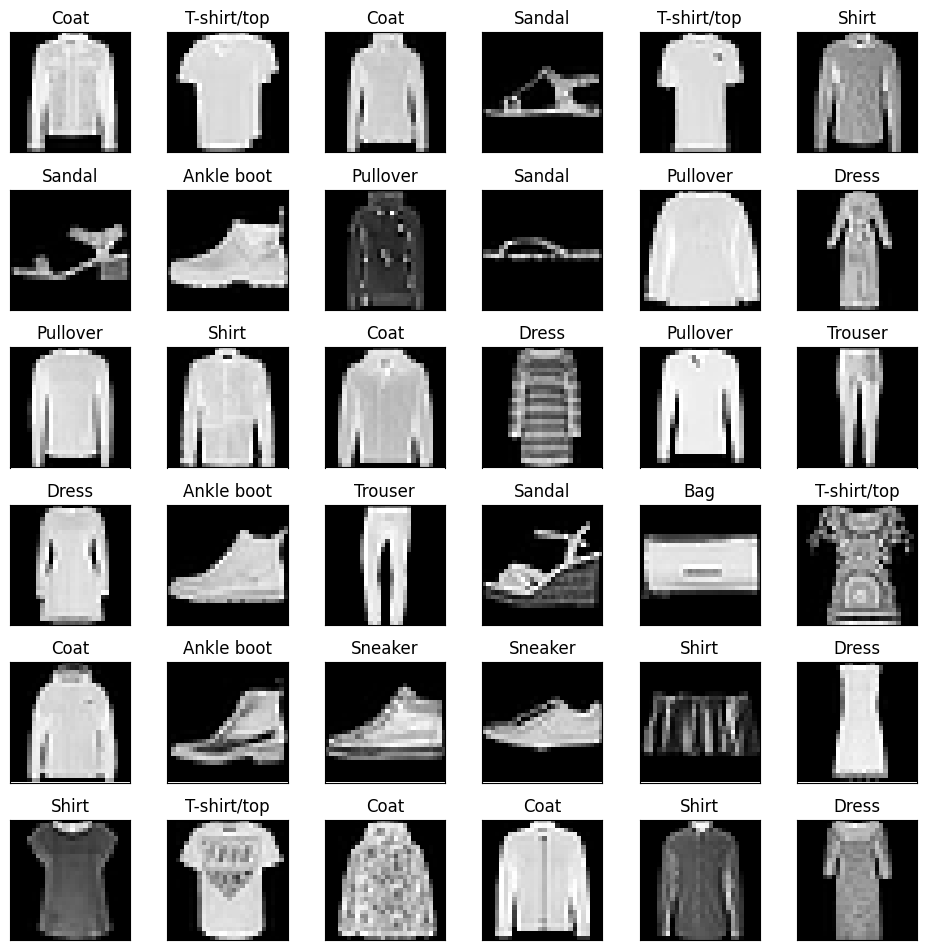

In [ ]:
h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6 * h, 1.6 * w)) # Crear la grilla de subgráficos

# Elegir ejemplos al azar del conjunto de prueba
indices_aleatorios = np.random.randint(len(test_labels), size=(h * w))

# Mostrar los ejemplos al azar en la grilla
for i in range(h):
    for j in range(w):
        # Obtener el índice del ejemplo aleatorio
        indice_aleatorio = indices_aleatorios[i * w + j]

        # Obtener la imagen del ejemplo aleatorio
        imagen = test_images[indice_aleatorio]
        # Obtener la etiqueta correspondiente al índice aleatorio
        etiqueta = test_labels[indice_aleatorio]

        # Mostrar la imagen en el subgráfico correspondiente
        axs[i, j].set_title(nombres[etiqueta])  # Título con el nombre de la categoría
        axs[i, j].grid(False)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].imshow(imagen, cmap='gray')  # Mostrar la imagen en escala de grises

# Ajustar la disposición de los subgráficos y mostrar la grilla
plt.tight_layout()
plt.show()


## Imagenes Train

In [ ]:
# Ruta al archivo .ubyte #TRAIN IMAGE
path2 = '/content/drive/MyDrive/SemestralDeepLearning/train-images-idx3-ubyte'

# Carga el archivo .ubyte utilizando idx2numpy
train_images = idx2numpy.convert_from_file(path2)

In [ ]:
import struct
# Ruta al archivo .ubyte de etiquetas
path_etiquetas1 = '/content/drive/MyDrive/SemestralDeepLearning/train-labels-idx1-ubyte'

# Función para cargar las etiquetas desde el archivo .ubyte
def cargar_etiquetas(path):
    with open(path, 'rb') as f:
        # Leer el encabezado del archivo
        magic_number, num_items = struct.unpack(">II", f.read(8))
        # Leer las etiquetas como bytes
        etiquetas_bytes = f.read()
        # Convertir bytes a una lista de enteros
        etiquetas = [int(byte) for byte in etiquetas_bytes]
    return etiquetas

# Cargar las etiquetas desde el archivo .ubyte
train_labels = cargar_etiquetas(path_etiquetas1)

# Mostrar las primeras 10 etiquetas como ejemplo
print("Etiquetas cargadas correctamente:")
print(train_labels[:10])

Etiquetas cargadas correctamente:
[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


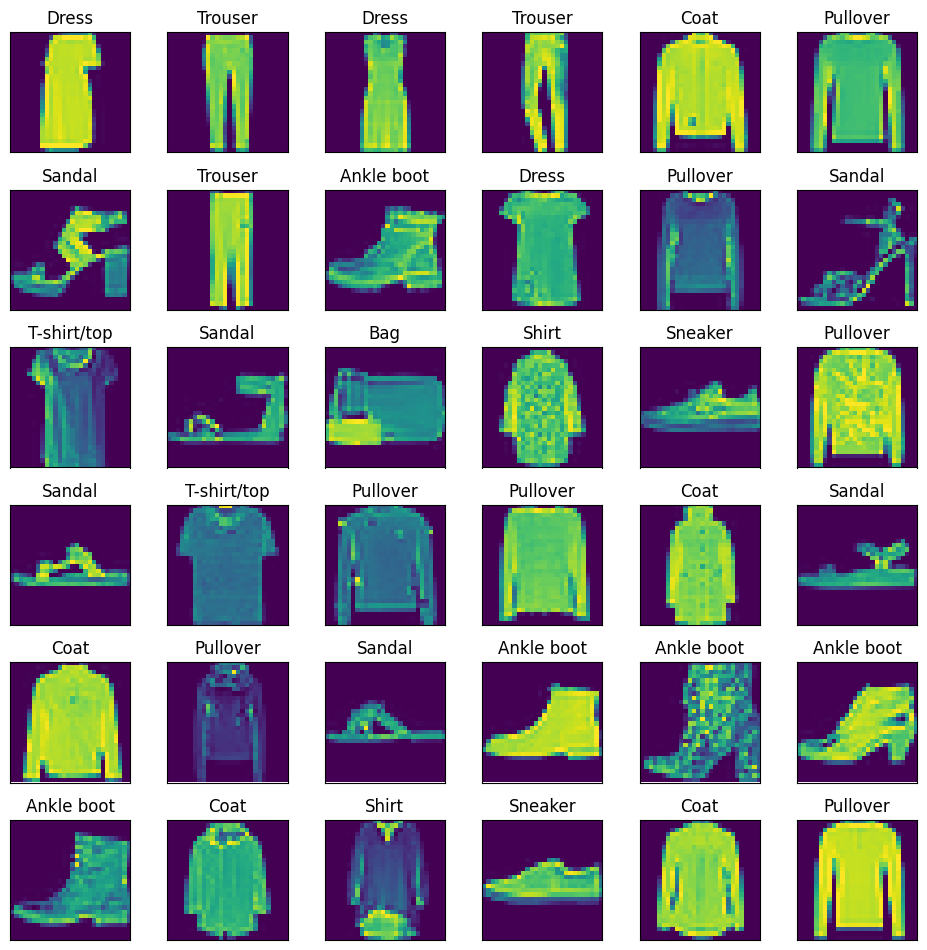

In [ ]:
import cv2

# Definir una función para convertir imágenes en escala de grises a RGB
#def gray_to_rgb(image):
    #return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

#h = 6 # alto de la grilla
#w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6 * h, 1.6 * w)) # Crear la grilla de subgráficos

# Elegir ejemplos al azar del conjunto de prueba
indices_aleatorios1 = np.random.randint(len(test_labels), size=(h * w))

# Mostrar los ejemplos al azar en la grilla
for i in range(h):
    for j in range(w):
        # Obtener el índice del ejemplo aleatorio
        indice_aleatorio2 = indices_aleatorios1[i * w + j]

        # Obtener la imagen del ejemplo aleatorio
        imagen = train_images[indice_aleatorio2]
        # Convertir la imagen a RGB si está en escala de grises
        #if len(imagen.shape) == 1:  # Si la imagen es de escala de grises
            #imagen = gray_to_rgb(imagen)
        # Obtener la etiqueta correspondiente al índice aleatorio
        etiqueta = train_labels[indice_aleatorio2]

        # Mostrar la imagen en el subgráfico correspondiente
        axs[i, j].set_title(nombres[etiqueta])  # Título con el nombre de la categoría
        axs[i, j].grid(False)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].imshow(imagen)  # Mostrar la imagen

# Ajustar la disposición de los subgráficos y mostrar la grilla
plt.tight_layout()
plt.show()


In [ ]:
# Imprimir el shape de la imagen
print(f"Shape de la imagen {indice_aleatorio2}: {imagen.shape}")

Shape de la imagen 4067: (28, 28)


# FASE 3: preparacion de los datos

## Entrenamiento de datos

In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras import regularizers

In [ ]:
# Imprimir valores únicos presentes en las etiquetas
unique_train_labels = np.unique(train_labels)
unique_test_labels = np.unique(test_labels)
print("Valores únicos en train_labels:", unique_train_labels)
print("Valores únicos en test_labels:", unique_test_labels)

Valores únicos en train_labels: [0 1 2 3 4 5 6 7 8 9]
Valores únicos en test_labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = train_images.reshape(60000,28,28,1)
X_test = test_images.reshape(10000,28,28,1)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(train_labels, 10)
Y_test = keras.utils.to_categorical(test_labels, 10)
print('Y', Y_train.shape, Y_test.shape)

X (60000, 28, 28, 1) (10000, 28, 28, 1)
Y (60000, 10) (10000, 10)


In [ ]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

28 10 60000 10000


# FASE 4 y 5: Creacion de la red y evaluacion

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam

## Creacion de las neuronas

In [ ]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

h1 = 32
h2 = 64
h3 = 128

### Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  # Métrica a monitorear
                               patience=10,         # Número de épocas sin mejora antes de detener el entrenamiento
                               restore_best_weights=True)  # Restaurar los pesos del modelo a la mejor época

## ReLU

In [ ]:
adamopt = Adam(lr=0.001)

red_conv = keras.Sequential()
red_conv.add(Conv2D(h1, (3,3), strides=(1, 1), input_shape=(28,28,1), activation='relu'))
red_conv.add(MaxPooling2D((2,2)))
red_conv.add(keras.layers.Dropout(0.25))

red_conv.add(Conv2D(h2, (3,3), strides=(1, 1), activation='relu'))
red_conv.add(MaxPooling2D((2,2)))
red_conv.add(keras.layers.Dropout(0.25))

red_conv.add(Conv2D(h3, (3,3), strides=(1, 1), activation='relu'))
red_conv.add(MaxPooling2D((2,2)))
red_conv.add(keras.layers.Dropout(0.25))

red_conv.add(keras.layers.Flatten())
red_conv.add(keras.layers.Dense(C, activation='softmax'))

red_conv.summary()

red_conv.compile(
    loss='categorical_crossentropy',
    optimizer= adamopt,
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [ ]:
hist = red_conv.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test),
        callbacks=[early_stopping]
       )

Epoch 1/50
469/469 [==============================] - 59s 123ms/step - loss: 0.8103 - accuracy: 0.7027 - val_loss: 0.5640 - val_accuracy: 0.7898
Epoch 2/50
469/469 [==============================] - 59s 126ms/step - loss: 0.5479 - accuracy: 0.7992 - val_loss: 0.4697 - val_accuracy: 0.8288
Epoch 3/50
469/469 [==============================] - 59s 126ms/step - loss: 0.4764 - accuracy: 0.8266 - val_loss: 0.4177 - val_accuracy: 0.8539
Epoch 4/50
469/469 [==============================] - 56s 119ms/step - loss: 0.4397 - accuracy: 0.8413 - val_loss: 0.3862 - val_accuracy: 0.8617
Epoch 5/50
469/469 [==============================] - 57s 122ms/step - loss: 0.4123 - accuracy: 0.8511 - val_loss: 0.3778 - val_accuracy: 0.8643
Epoch 6/50
469/469 [==============================] - 62s 132ms/step - loss: 0.3928 - accuracy: 0.8559 - val_loss: 0.3514 - val_accuracy: 0.8740
Epoch 7/50
469/469 [==============================] - 51s 109ms/step - loss: 0.3758 - accuracy: 0.8632 - val_loss: 0.3565 - val_ac

### metricas

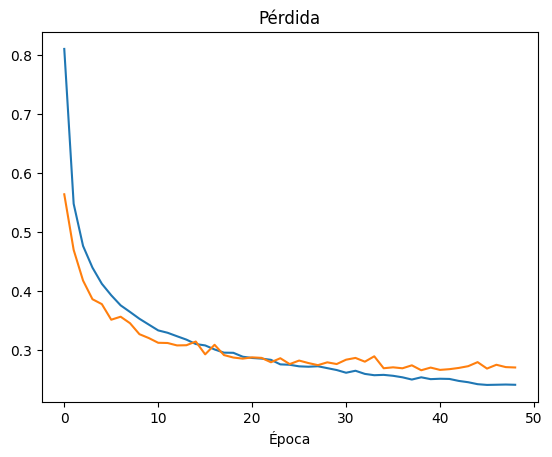

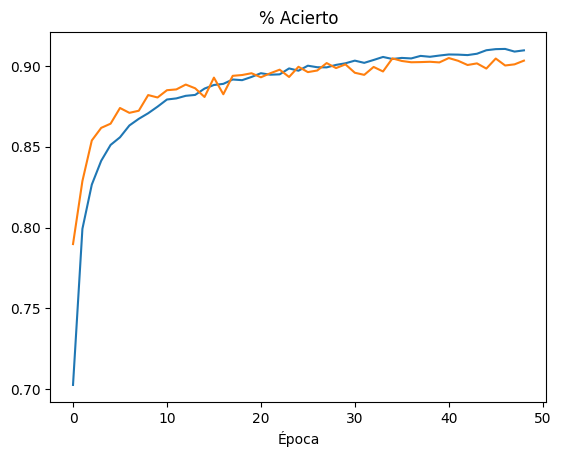

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')
plt.show()

# Conclusion

Por que usamos estos parametros?

1.   Filtros pequeños (3x3): Capturan patrones locales (bordes, texturas) relevantes en prendas de vestir sin perder detalles finos.
2.   Múltiples capas convolucionales: Permiten aprender jerarquías de características, desde simples a complejas, ideal para identificar elementos distintivos de la moda.
3.   MaxPooling: Reduce la dimensionalidad, manteniendo la información espacial más relevante y haciendo la red menos susceptible al sobreajuste.
4.   Dropout: Regulariza la red al desactivar neuronas aleatoriamente, mejorando la generalización y evitando la dependencia excesiva de características específicas.
5.   Adam Optimizer: Su capacidad de adaptarse a las tasas de aprendizaje para cada parámetro individualmente tiende a converger más rápido y eficientemente que otros optimizadores en problemas como Fashion-MNIST.



